In [23]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

최소제곱법으로 가중치와 바이어스를 계산할 데이터를 만든다.

In [24]:
x = [2, 4, 6, 8]  # 공부시간
y = [81, 93, 91, 97]  # 시험점수

공부시간과 시험점수 데이터를 판다스 데이터프레임으로 만든다.

In [25]:
df = pd.DataFrame(columns=['x', 'y'])  # 빈 데이터프레임 생성
# 빈 데이터프레임에 데이터를 넣을 때는 loc[인덱스]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
for i in range(len(x)):
    df.loc[i] = [x[i], y[i]]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


공부시간과 시험점수 시각화

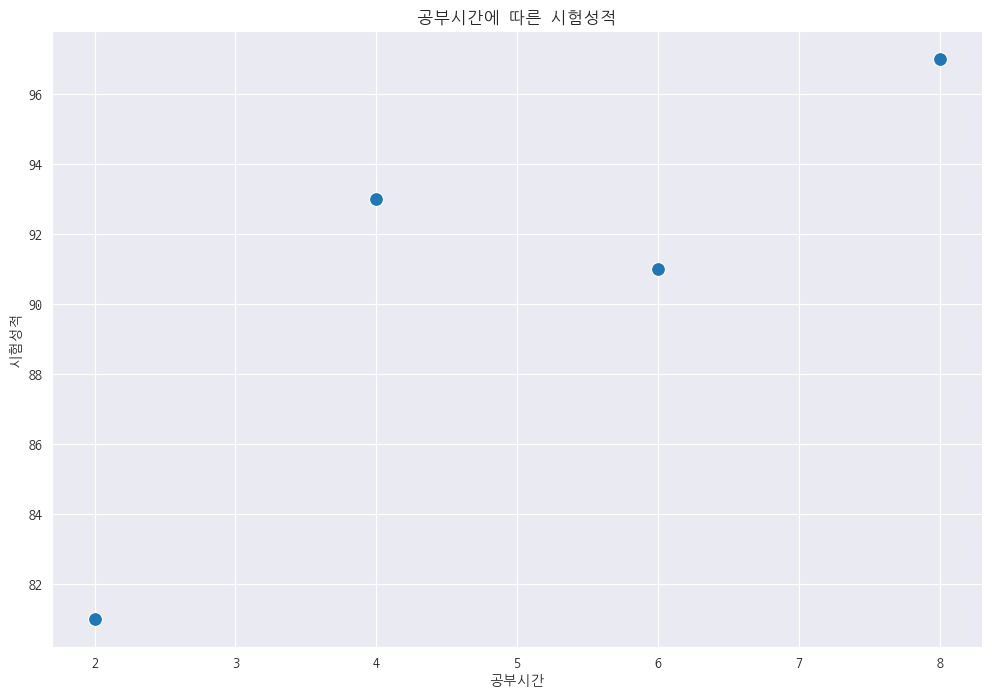

In [26]:
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=100)
# plt.scatter(x, y, s=100)
plt.title('공부시간에 따른 시험성적')
plt.xlabel('공부시간')
plt.ylabel('시험성적')
plt.show()

# 가중치 공식(Markdown 수식 작성)
# $\frac{\sum_{i=0}^{n-1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i=0}^{n-1}(x_i - \bar x)^2}$

In [27]:
mean_x = np.mean(x) # 공부시간의 평균
mean_y = np.mean(y) # 시험점수의 평균(실제값)
print(f'평균 공부시간: {mean_x}시간, 평균 시험점수: {mean_y}점')

평균 공부시간: 5.0시간, 평균 시험점수: 90.5점


가중치 분자 계산 함수

In [28]:
def top(x, mean_x, y, mean_y):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) * (y[i] - mean_y)
    return top

가중치 분모 계산 함수

In [34]:
'''
def bottom(x, mean_x):
    total = 0.0
    for i in range(len(x)):
        total += (x[i] - mean_x) ** 2
    return total
'''

divisor = sum([(i - mean_x) ** 2 for i in x])
print(divisor)

20.0


In [42]:
w = top(x, mean_x, y, mean_y) / divisor
print('가중치: w =', w)

가중치 a = 2.3


# 편향 공식
# $\bar y - (w * \bar x)$

In [43]:
b = mean_y - (mean_x * w)
print('편향: b =', b)

바이어스 b = 79.0
